In [ ]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from IPython.core.display import HTML
from sklearn.tree import export_text
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
wine_df['many_phenols'] = np.where(wine_df['total_phenols'] > wine_df['total_phenols'].quantile(0.65), 1, 0)
wine_df.drop(['total_phenols'], axis=1, inplace=True)

<ipython-input-14-42956e5e8f46>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='many_phenols', data=wine_df, palette='hls')


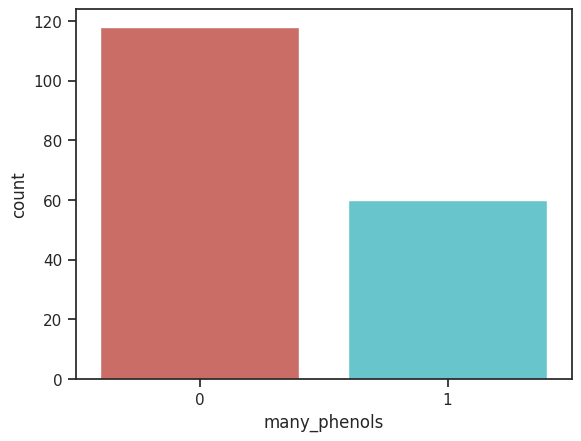

In [ ]:
sns.countplot(x='many_phenols', data=wine_df, palette='hls')
plt.show()

In [ ]:
last_column = wine_df.pop('many_phenols')
wine_df.insert(len(wine_df.columns), 'many_phenols', last_column)
X = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values

In [ ]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test_logreg = logreg.predict(X_test)
y_pred_train_logreg = logreg.predict(X_train)
ac1 = accuracy_score(y_train, y_pred_train_logreg), accuracy_score(y_test, y_pred_test_logreg)
ac1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9084507042253521, 0.8611111111111112)

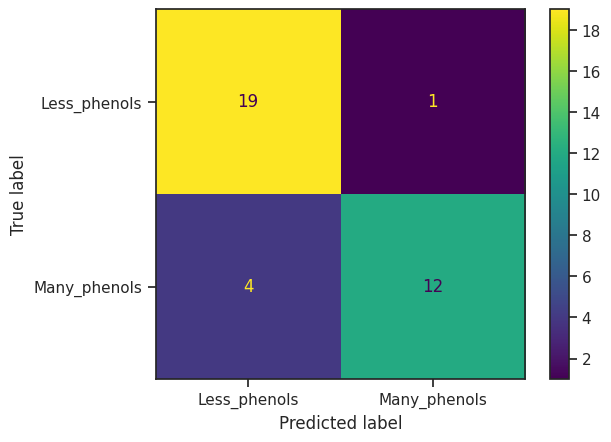

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_test_logreg, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Less_phenols', 'Many_phenols'])
disp.plot()

In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
ac2 = accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)
ac2

(0.7887323943661971, 0.6666666666666666)

In [ ]:
param_grid = {'degree': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'kernel':['poly']}
grid = GridSearchCV(SVC(), param_grid, verbose=2, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=3, kernel=poly; total time=   0.0s
[CV] END ..............................degree=3,

{'degree': 14, 'kernel': 'poly'}

In [ ]:
svc = SVC(kernel='poly', degree=14)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)

(0.8380281690140845, 0.6944444444444444)

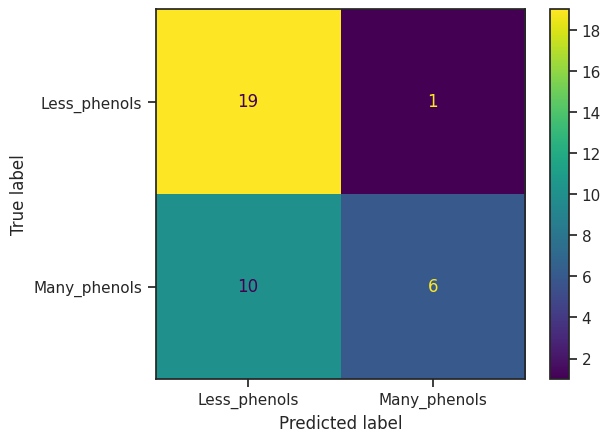

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_test_svc, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Less_phenols', 'Many_phenols'])
disp.plot()

In [ ]:
tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred_test_tree = tree.predict(X_test)
y_pred_train_tree = tree.predict(X_train)
ac3 = accuracy_score(y_train, y_pred_train_tree), accuracy_score(y_test, y_pred_test_tree)
ac3

(1.0, 0.9166666666666666)

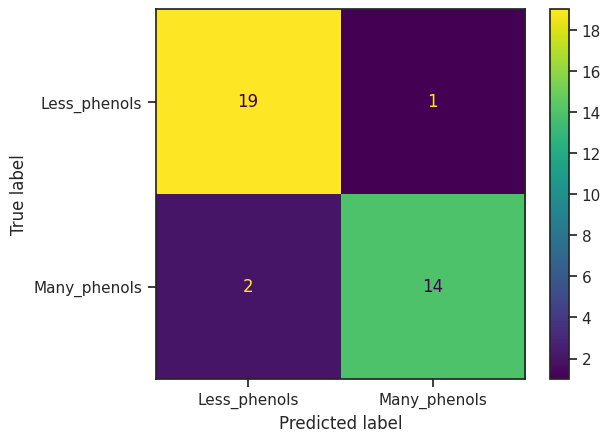

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_test_tree, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Less_phenols', 'Many_phenols'])
disp.plot()

In [ ]:
# сравнение качества моделей по 2 метрикам
print('LogisticRegression:     ', ac1)
print('SVM:                    ', ac2)
print('DecisionTreeClassifier: ', ac3)

LogisticRegression:      (0.9084507042253521, 0.8611111111111112)
SVM:                     (0.7887323943661971, 0.6666666666666666)
DecisionTreeClassifier:  (1.0, 0.9166666666666666)


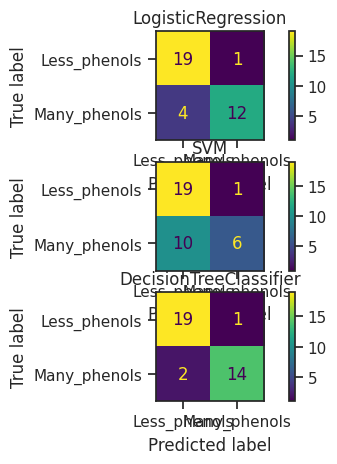

In [ ]:
fig, ax = plt.subplots(3,1)
ax[0].set_title("LogisticRegression")
ax[1].set_title("SVM")
ax[2].set_title("DecisionTreeClassifier")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Less_phenols', 'Many_phenols']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Less_phenols', 'Many_phenols']).plot(ax=ax[1])

ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Less_phenols', 'Many_phenols']).plot(ax=ax[2])

In [ ]:
tree_rules = export_text(tree, feature_names=list(wine_df.iloc[:, :-1].columns))
HTML('<pre>' + tree_rules + '</pre>')

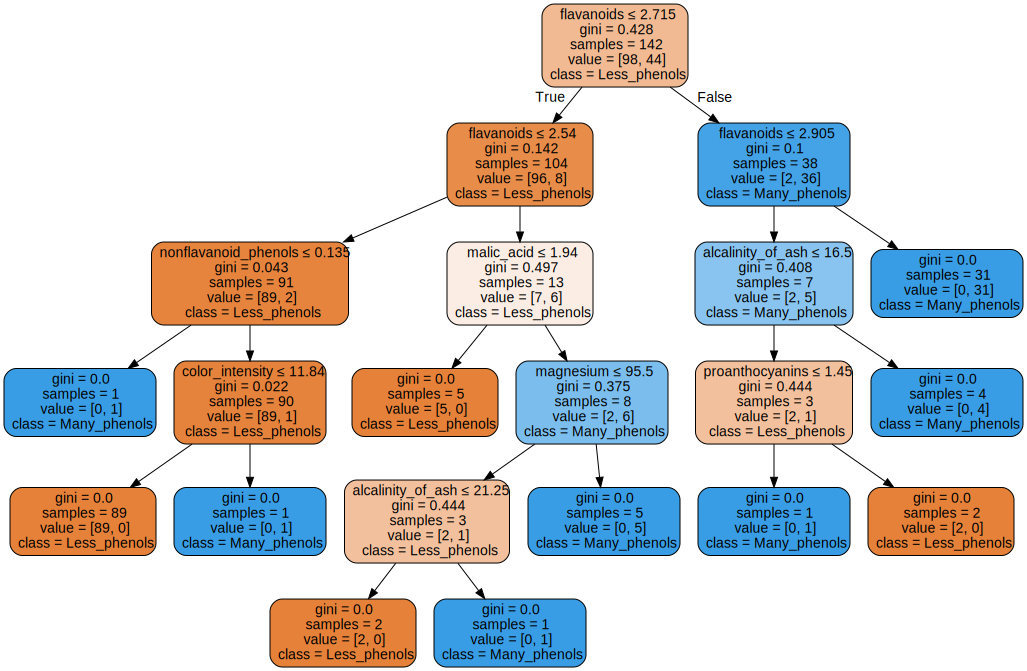

In [ ]:
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=wine_df.iloc[:, :-1].columns,
                           class_names=['Less_phenols', 'Many_phenols'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

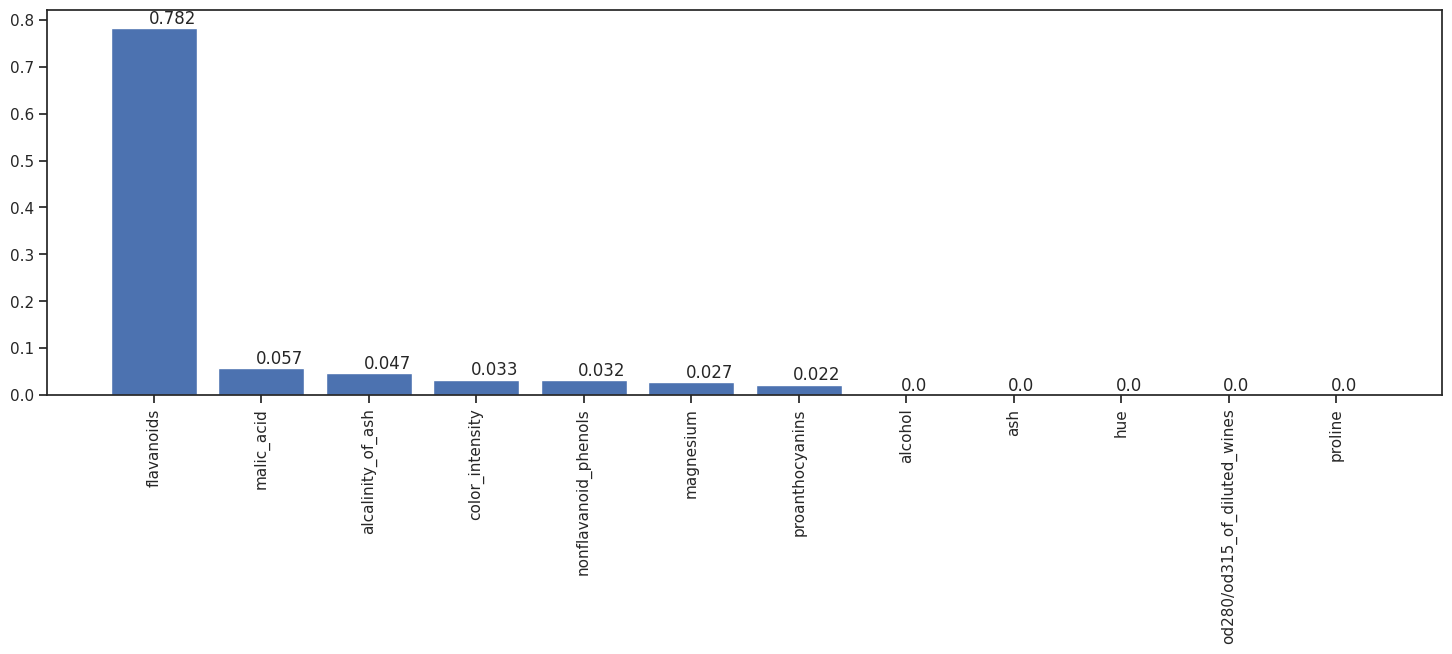

In [ ]:
fl, fd = draw_feature_importances(tree, wine_df.iloc[:, :-1])